<a href="https://colab.research.google.com/github/alawrence30/Deep-Learning/blob/main/Assignment_03_part00%20-%20v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/djp840/MSDS_458_Public/blob/master/images/NorthwesternHeader.png?raw=1">

## MSDS458 Research Assignment 3 - Part 00

## Analyze AG_NEWS_SUBSET Data <br>

AG is a collection of more than 1 million news articles. News articles have been gathered from more than 2000 news sources by ComeToMyHead in more than 1 year of activity. ComeToMyHead is an academic news search engine which has been running since July, 2004. The dataset is provided by the academic comunity for research purposes in data mining (clustering, classification, etc), information retrieval (ranking, search, etc), xml, data compression, data streaming, and any other non-commercial activity.<br> 

For more information, please refer to the link http://www.di.unipi.it/~gulli/AG_corpus_of_news_articles.html<br> 


The AG's news topic classification dataset is constructed by choosing 4 largest classes (**World**, **Sports**, **Business**, and **Sci/Tech**) from the original corpus. Each class contains 30,000 training samples and 1,900 testing samples. The total number of training samples is 120,000 and testing 7,600.<br>

Homepage: https://arxiv.org/abs/1509.01626<br>

Source code: tfds.text.AGNewsSubset

Versions:

1.0.0 (default): No release notes.
Download size: 11.24 MiB

Dataset size: 35.79 MiB

<div class="alert alert-block alert-success">
    <b>More Technical</b>: Throughout the notebook. This types of boxes provide more technical details and extra references about what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div>

In [28]:
#!conda install -c anaconda tensorflow-datasets --y
#!pip install -c anaconda tensorflow-datasets --y

# Deep learning for text

## Natural-language processing: The bird's eye view

Handcrafted rules held out as the dominant approach well into the 1990s. But starting in the late 1980s, faster computers and greater data availability started making a better alternative viable. 

We started seeing machine learning approaches to natural language processing. The earliest ones were based on `decision trees`—the intent was literally to automate the development of the kind of if/then/else rules of previous systems

Then statistical approaches started gaining speed, starting with `logistic regression`. Over time, learned parametric models fully took over, and linguistics came to be seen as more of a hindrance than a useful tool. 

In early 2015, Keras made available the first open source, easy-to-use implementation of `LSTM`, just at the start of a massive wave of renewed interest in recurrent neural networks—until then, there had only been “research code” that couldn’t be readily reused. 

Then from 2015 to 2017, recurrent neural networks dominated the booming NLP scene. `Bidirectional LSTM` models, in particular, set the state of the art on many important tasks, from summarization to question-answering to machine translation.

Finally, around 2017–2018, a new architecture rose to replace RNNs: the `Transformer`. Transformers unlocked considerable progress across the field in a short period of time, and today most NLP systems are based on them.

## Common Natural Language Processing Tasks

The applications of natural language algorithms are commonly called tasks. Here are some popular tasks:

1. **Sentiment Analysis**: Given opinionated text like a movie review, determine whether the overall sense is positive or negative.
2. **Translation**: Turn text into another language.
Answer Questions: Answer questions about the text, like who is the hero, or what actions occurred.
3. **Summarize or Paraphrase**: Provide a short overview of the text, emphasizing the main points.
4. **Generate New Text**: Given some starting text, write more text that seems to follow from it.
5. **Logical Flow**: If a sentence first asserts a premise and the following sentence asserts a conclusion based on that premise, determine whether the conclusion logically follows from the premise.

## Preparing text data

<img src="https://github.com/djp840/MSDS_458_Public/blob/master/images/11-01.png?raw=1">


## Text standardization

Text standardization is a basic form of feature engineering that aims to erase encoding differences that you don’t want your model to have to deal with. It’s not exclusive to machine learning, either—you’d have to do the same thing if you were building a search engine.

One of the simplest and most widespread standardization schemes is “convert to lowercase and remove punctuation characters.” 

With these standardization techniques, your model will require less training data and will generalize better—it won’t need abundant examples of both “Sunset” and “sunset” to learn that they mean the same thing...

## Text splitting (tokenization)

Once your text is standardized, you need to break it up into units to be vectorized (tokens), a step called tokenization. You could do this in three different ways:

* `Word-level tokenization`—Where tokens are space-separated (or punctuation-separated) substrings. A variant of this is to further split words into subwords when applicable—for instance, treating “staring” as “star+ing” or “called” as “call+ed.”
* `N-gram tokenization`—Where tokens are groups of N consecutive words. For instance, “the cat” or “he was” would be 2-gram tokens (also called bigrams).
* `Character-level tokenization`—Where each character is its own token. In practice, this scheme is rarely used, and you only really see it in specialized contexts, like text generation or speech recognition.


Here’s a simple example. Consider the sentence “the cat sat on the mat.” It may be decomposed into the following set of 2-grams:

`{"the", "the cat", "cat", "cat sat", "sat",
 "sat on", "on", "on the", "the mat", "mat"}`

It may also be decomposed into the following set of 3-grams:

`{"the", "the cat", "cat", "cat sat", "the cat sat",
 "sat", "sat on", "on", "cat sat on", "on the",
 "sat on the", "the mat", "mat", "on the mat"}`

`One-dimensional convnets`, `recurrent neural networks`, and `Transformers` are capable of learning representations for groups of words and characters without being explicitly told about the existence of such groups, by looking at continuous word or character sequences.

## Vocabulary indexing

1. Build an index of all terms found in the training data (the “vocabulary”), and assign a unique integer to each entry in the vocabulary.
```python
vocabulary = {} 
for text in dataset:
    text = standardize(text)
    tokens = tokenize(text)
    for token in tokens:
        if token not in vocabulary:
            vocabulary[token] = len(vocabulary)
```

2. You can then convert that integer into a vector encoding that can be processed by a neural network, like a one-hot vector:
```python
def one_hot_encode_token(token):
    vector = np.zeros((len(vocabulary),))
    token_index = vocabulary[token]
    vector[token_index] = 1 
    return vector
```

## Using the TextVectorization layer

```python
import string
  
class Vectorizer:
    def standardize(self, text):
        text = text.lower()
        return "".join(char for char in text 
                       if char not in string.punctuation)
  
    def tokenize(self, text):
        text = self.standardize(text)
        return text.split()
  
    def make_vocabulary(self, dataset):
        self.vocabulary = {"": 0, "[UNK]": 1}
        for text in dataset:
            text = self.standardize(text)
            tokens = self.tokenize(text)
            for token in tokens:
                if token not in self.vocabulary:
                    self.vocabulary[token] = len(self.vocabulary)
        self.inverse_vocabulary = dict(
            (v, k) for k, v in self.vocabulary.items())
  
    def encode(self, text):
        text = self.standardize(text)
        tokens = self.tokenize(text)
        return [self.vocabulary.get(token, 1) for token in tokens]
  
    def decode(self, int_sequence):
        return " ".join(
            self.inverse_vocabulary.get(i, "[UNK]") for i in int_sequence)
  
vectorizer = Vectorizer()
# Haiku by poet Hokushi
dataset = [           
    "I write, erase, rewrite",   
    "Erase again, and then",     
    "A poppy blooms.",           
]
vectorizer.make_vocabulary(dataset)
```

```python
>>> test_sentence = "I write, rewrite, and still rewrite again" 
>>> encoded_sentence = vectorizer.encode(test_sentence)
>>> print(encoded_sentence)
[2, 3, 5, 7, 1, 5, 6]
>>> decoded_sentence = vectorizer.decode(encoded_sentence)
>>> print(decoded_sentence)
"i write rewrite and [UNK] rewrite again" 
```

However, using something like this wouldn’t be very performant. In practice, you’ll work with the Keras `TextVectorization` layer, which is fast and efficient and can be dropped directly into a `tf.data` pipeline or a Keras model.

```python
from tensorflow.keras.layers import TextVectorization
text_vectorization = TextVectorization(
    output_mode="int",    # Configures the layer to return sequences of words encoded as integer indices. 
)


By default, the `TextVectorization` layer will use the setting “convert to lowercase and remove punctuation” for text standardization, and “split on whitespace” for tokenization. 

```python
import re 
import string 
import tensorflow as tf
  
def custom_standardization_fn(string_tensor):
    lowercase_string = tf.strings.lower(string_tensor)              ❶
    return tf.strings.regex_replace(                                ❷
        lowercase_string, f"[{re.escape(string.punctuation)}]", "")
  
def custom_split_fn(string_tensor):
    return tf.strings.split(string_tensor)                          ❸
 
text_vectorization = TextVectorization(
    output_mode="int",
    standardize=custom_standardization_fn,
    split=custom_split_fn,
)
```

❶ Convert strings to lowercase.

❷ Replace punctuation characters with the empty string.

❸ Split strings on whitespace.

To index the vocabulary of a text corpus, just call the `adapt()` method of the layer with a `Dataset` object that yields strings, or just with a list of Python strings:
```python
dataset = [
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
]
text_vectorization.adapt(dataset)
```

Note that you can retrieve the computed vocabulary via `get_vocabulary()`
```python
>>> text_vectorization.get_vocabulary()
["", "[UNK]", "erase", "write", ...]
```

This method can be useful if you need to convert text encoded as integer sequences back into words. The first two entries in the vocabulary are the `mask` token (index 0) and the `OOV` token (index 1). 

Entries in the vocabulary list are sorted by frequency, so with a real-world dataset, very common words like “the” or “a” would come first.

## Two ways we could use our `TextVectorization` layer

####  The first option is to put it in the `tf.data pipeline`, like this:

There are two ways we could use our TextVectorization layer. The first option is to put it in the `tf.data pipeline`, like this:
```python
int_sequence_dataset = string_dataset.map(   ❶
    text_vectorization,
    num_parallel_calls=4)                    ❷
```

❶ string_dataset would be a dataset that yields string tensors.

❷ The num_parallel_calls argument is used to parallelize the map() call across multiple CPU cores.

#### The second option is to make it part of the `model` (after all, it’s a Keras layer), like this:

The second option is to make it part of the model (after all, it’s a Keras layer), like this:
```python
text_input = keras.Input(shape=(), dtype="string")             ❶
vectorized_text = text_vectorization(text_input)               ❷
embedded_input = keras.layers.Embedding(...)(vectorized_text)  ❸
output = ...                                                   ❸
model = keras.Model(text_input, output) 
```
❶ Create a symbolic input that expects strings.

❷ Apply the text vectorization layer to it.

❸ You can keep chaining new layers on top—just your regular Functional API model.

***There’s an important difference between the two**: if the vectorization step is part of the model, it will happen synchronously with the rest of the model. This means that at each training step, the rest of the model (placed on the GPU) will have to wait for the output of the TextVectorization layer (placed on the CPU) to be ready in order to get to work. 

Meanwhile, putting the layer in the `tf.data` pipeline enables you to do asynchronous preprocessing of your data on CPU: while the GPU runs the model on one batch of vectorized data, the CPU stays busy by vectorizing the next batch of raw strings.

So if you’re training the model on GPU or TPU, you’ll probably want to go with the first option to get the best performance.

Now, if you were to export our model to a production environment, you would want to ship a model that accepts raw strings as input—otherwise you would have to reimplement text standardization and tokenization in your production environment (maybe in JavaScript?), and you would face the risk of introducing small preprocessing discrepancies that would hurt the model’s accuracy. Thankfully, the TextVectorization layer enables you to include text preprocessing right into your model, making it easier to deploy.

## Exporting a model that processes raw strings

```python
inputs = keras.Input(shape=(1,), dtype="string")   ❶
processed_inputs = text_vectorization(inputs)      ❷
outputs = model(processed_inputs)                  ❸
inference_model = keras.Model(inputs, outputs)     ❹
```

❶ One input sample would be one string.

❷ Apply text preprocessing.

❸ Apply the previously trained model.

❹ Instantiate the end-to-end model.

The resulting model can process batches of `raw strings`:
```python
import tensorflow as tf
raw_text_data = tf.convert_to_tensor([
    ["That was an excellent movie, I loved it."],
])
predictions = inference_model(raw_text_data) 
print(f"{float(predictions[0] * 100):.2f} percent positive")
```

## Import packages 

In [29]:
import datetime
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd
import time
import string

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.layers import TextVectorization

In [30]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

## Verify TensorFlow Version and Keras Version

In [31]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.9.2


In [32]:
print("Keras version: ", keras.__version__)

Keras version:  2.9.0


## Mount Google Drive to Colab Environment

In [33]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Visualization Utility Functions

In [34]:
def print_validation_report(test_labels, predictions):
    print("Classification Report")
    print(classification_report(test_labels, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(test_labels, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(test_labels, predictions)))) 
    
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

## Vectorization Class

In [35]:
class Vectorizer:
    def standardize(self, text):
        text = text.lower()
        return "".join(char for char in text if char not in string.punctuation)

    def tokenize(self, text):
        text = self.standardize(text)
        return text.split()

    def make_vocabulary(self, dataset):
        self.vocabulary = {"": 0, "[UNK]": 1}
        for text in dataset:
            text = self.standardize(text)
            tokens = self.tokenize(text)
            for token in tokens:
                if token not in self.vocabulary:
                    self.vocabulary[token] = len(self.vocabulary)
        self.inverse_vocabulary = dict(
            (v, k) for k, v in self.vocabulary.items())

    def encode(self, text):
        text = self.standardize(text)
        tokens = self.tokenize(text)
        return [self.vocabulary.get(token, 1) for token in tokens]

    def decode(self, int_sequence):
        return " ".join(
            self.inverse_vocabulary.get(i, "[UNK]") for i in int_sequence)


## AG_NEWS_SUBSET Data in CSV files 
<div class="alert alert-block alert-info">
    <b> ag_news_subset</b><br>
    See  https://www.kaggle.com/amananandrai/ag-news-classification-dataset
 
  <li>We combined the Title and Description columns into a Title_Description column in the training and test csv files.</li>
  <li>We also created a validation csv file using some of the data from the training csv file.</li>
</ol>

 </div>

In [37]:
train_df = pd.read_csv('gdrive/My Drive/MSDS 458/MSDS_458_Public-master/MSDS458_Assignment_03/data/train.csv')
val_df = pd.read_csv('gdrive/My Drive/MSDS 458/MSDS_458_Public-master/MSDS458_Assignment_03/data/val.csv')
test_df = pd.read_csv('gdrive/My Drive/MSDS 458/MSDS_458_Public-master/MSDS458_Assignment_03/data/test.csv')
print(f"There are {train_df.shape[0]} news articles for training.")
print(f"There are {val_df.shape[0]} news articles for validation.")
print(f"There are {test_df.shape[0]} news articles for testing.")

There are 114000 news articles for training.
There are 6000 news articles for validation.
There are 7600 news articles for testing.


In [38]:
train_df.head(2).T

,0,1
Label,2,2
Title,Wall St. Bears Claw Back Into the Black (Reuters),Carlyle Looks Toward Commercial Aerospace (Reu...
Description,"Reuters - Short-sellers, Wall Street's dwindli...",Reuters - Private investment firm Carlyle Grou...
Title_Description,Wall St. Bears Claw Back Into the Black (Reute...,Carlyle Looks Toward Commercial Aerospace (Reu...


In [39]:
test_df.head(2).T

,0,1
Label,2,3
Title,Fears for T N pension after talks,The Race is On: Second Private Team Sets Launc...
Description,Unions representing workers at Turner Newall...,"SPACE.com - TORONTO, Canada -- A second\team o..."
Title_Description,Fears for T N pension after talks Unions repre...,The Race is On: Second Private Team Sets Launc...


In [41]:
all_df = pd.read_csv('gdrive/My Drive/MSDS 458/MSDS_458_Public-master/MSDS458_Assignment_03/data/all.csv')
all_df.shape

(127600, 4)

In [42]:
all_df.head(2).T

,0,1
Label,2,2
Title,Wall St. Bears Claw Back Into the Black (Reuters),Carlyle Looks Toward Commercial Aerospace (Reu...
Description,"Reuters - Short-sellers, Wall Street's dwindli...",Reuters - Private investment firm Carlyle Grou...
Title_Description,Wall St. Bears Claw Back Into the Black (Reute...,Carlyle Looks Toward Commercial Aerospace (Reu...


## Review Examples By Classification

In [43]:
categories = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}
all_df.Label.value_counts(sort=False).rename(index=categories)

Business    31900
Sci/Tech    31900
Sports      31900
World       31900
Name: Label, dtype: int64

## Vectorization Example

In [44]:
vectorizer = Vectorizer()
dataset = [
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
]
vectorizer.make_vocabulary(dataset)

In [45]:
test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = vectorizer.encode(test_sentence)
print(encoded_sentence)

[2, 3, 5, 7, 1, 5, 6]


In [46]:
decoded_sentence = vectorizer.decode(encoded_sentence)
print(decoded_sentence)

i write rewrite and [UNK] rewrite again


<div class="alert alert-block alert-success">
    <b> TensorFlow Make CSV Dataset</b><br>
    https://www.tensorflow.org/api_docs/python/tf/data/experimental/make_csv_dataset
    </div>

Reads CSV files into a dataset, where each element of the dataset is a (features, labels) tuple that corresponds to a batch of CSV rows. The features dictionary maps feature column names to Tensors containing the corresponding feature data, and labels is a Tensor containing the batch's label data.

By default, the first rows of the CSV files are expected to be headers listing the column names. If the first rows are not headers, set header=False and provide the column names with the column_names argument.

By default, the dataset is repeated indefinitely, reshuffling the order each time. This behavior can be modified by setting the num_epochs and shuffle arguments.

## Load CSV Datasets Convert TensorFlow Dataset (Training, Validation, Test)

In [48]:
batch_size = 32
train_ds =\
tf.data.experimental.make_csv_dataset('gdrive/My Drive/MSDS 458/MSDS_458_Public-master/MSDS458_Assignment_03/data/train.csv',select_columns=['Title_Description','Label'],
                                      label_name="Label",num_epochs=1, batch_size=batch_size)
val_ds =\
tf.data.experimental.make_csv_dataset('gdrive/My Drive/MSDS 458/MSDS_458_Public-master/MSDS458_Assignment_03/data/val.csv',select_columns=['Title_Description','Label'],
                                      label_name="Label",num_epochs=1,batch_size=batch_size)
test_ds =\
tf.data.experimental.make_csv_dataset('gdrive/My Drive/MSDS 458/MSDS_458_Public-master/MSDS458_Assignment_03/data//test.csv',select_columns=['Title_Description','Label'],
                                      label_name="Label",num_epochs=1,batch_size=batch_size)

## Review First Article in Training Dataset

In [49]:
for inputs, targets in train_ds:
    print(f"The first batch has {inputs['Title_Description'].shape[0]} articles with {targets.shape[0]} labels.")
    print(f"The articles have type {inputs['Title_Description'].dtype}, the labels type: {targets.dtype}\n")
    
    # just print the first news article in the batch
    print(f"The first news article:\n{inputs['Title_Description'][0]}\n") 

    print(f"It is a {categories[targets[0].numpy()]} article.")
    break

The first batch has 32 articles with 32 labels.
The articles have type <dtype: 'string'>, the labels type: <dtype: 'int32'>

The first news article:
b'Eight men face terror charges Police in the UK charge eight men with terror offences, including conspiracy to murder.'

It is a World article.


## Load CSV Datasets Convert TensorFlow Dataset (All Dataset)

In [51]:
all_ds =\
tf.data.experimental.make_csv_dataset('gdrive/My Drive/MSDS 458/MSDS_458_Public-master/MSDS458_Assignment_03/data//all.csv',select_columns=['Title_Description','Label'],
                                      label_name="Label",num_epochs=1, batch_size=1)

<div class="alert alert-block alert-success">
    <b>tf.keras.layers.TextVectorization</b><br>
    https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization
    </div>

In [52]:
text_vectorization = TextVectorization(
    output_mode="int",
)
text_only_all_ds = all_ds.map(lambda x, y: x['Title_Description'])

## Review First Article in Training Dataset

In [53]:
for text in text_only_all_ds:
    print(f"Get first batch of {text.shape[0]} news articles.\n")
    print(f"Here is the first news article:\n\n{text[0]}.")
    break

Get first batch of 1 news articles.

Here is the first news article:

b'US tops league of e-mail spammers The US is responsible for most of the spam e-mails that fill up computer inboxes, says a report.'.


Create the layer, and pass the dataset's text to the layer's `.adapt` method:
The processing of each sample contains the following steps:

    standardize each sample (usually lowercasing + punctuation stripping)
    split each sample into substrings (usually words)
    recombine substrings into tokens (usually ngrams)
    index tokens (associate a unique int value with each token)
    transform each sample using this index, either into a vector of ints or a dense float vector.

In [54]:
%%time
text_vectorization.adapt(text_only_all_ds)

CPU times: user 2min 56s, sys: 20.4 s, total: 3min 16s
Wall time: 3min 22s


## Vocabulary Words In Corpus

In [55]:
vocab = text_vectorization.get_vocabulary()
print(f"There are {len(vocab)} vocabulary words in the corpus.")

There are 105275 vocabulary words in the corpus.


## Example 12 Words 

In [56]:
vocab[:12]

['', '[UNK]', 'the', 'to', 'a', 'of', 'in', 'and', 'on', 'for', '39s', 'that']

## Vectorization - Title Description Column

In [57]:
%%time
doc_sizes = []
corpus = []
for example, _ in all_ds:
  enc_example = text_vectorization(example['Title_Description'])
  doc_sizes.append(enc_example.shape[1])
  corpus+=list(enc_example.numpy()[0])

CPU times: user 11min 35s, sys: 1min 11s, total: 12min 47s
Wall time: 10min 51s


In [58]:
print(f"There are {len(corpus)} words in the corpus of {len(doc_sizes)} news articles.")
print(f"Each news article has between {min(doc_sizes)} and {max(doc_sizes)} tokens in it.")

There are 4773046 words in the corpus of 127600 news articles.
Each news article has between 4 and 177 tokens in it.


In [59]:
corpus[:5]

[1694, 14, 1566, 656, 11977]

## Plot Distribution of Percent of Non-Vocabulary Words in News Articles

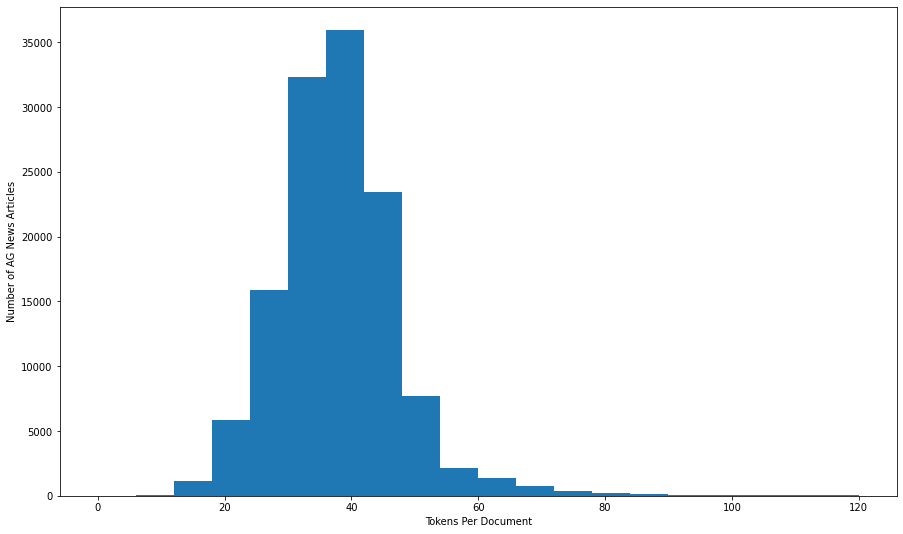

In [60]:
plt.figure(figsize=(15,9))
plt.hist(doc_sizes, bins=20,range = (0,120))
plt.xlabel("Tokens Per Document")
plt.ylabel("Number of AG News Articles");

## Top 1000 Words Vectorized

In [61]:
%%time
from tensorflow.keras.layers import TextVectorization
encoder_1000 = TextVectorization(
    output_mode="int",
    max_tokens=1000
)
encoder_1000.adapt(text_only_all_ds)
vocab_1000 = np.array(encoder_1000.get_vocabulary());

CPU times: user 2min 53s, sys: 19.8 s, total: 3min 13s
Wall time: 3min 21s


## Example 20 Words

In [62]:
vocab_1000[:20]

array(['', '[UNK]', 'the', 'to', 'a', 'of', 'in', 'and', 'on', 'for',
       '39s', 'that', 'with', 'as', 'at', 'its', 'is', 'new', 'by',
       'said'], dtype='<U14')

In [63]:
example = "the dog ran after a red ball as it rolled by the hat on the ground."
enc_example = encoder_1000(example).numpy()
enc_example

array([  2,   1,   1,  29,   4, 178,   1,  13,  20,   1,  18,   2,   1,
         8,   2,   1])

## Zero and One are Special Value Integers ( 0 = Padding, 1 = Unknown Word)

In [64]:
num_ones = tf.math.count_nonzero(enc_example==1).numpy()
num_ones

6

## Encode Sequences Leveraging 1000 Word Vocabulary 

In [65]:
%%time
doc1000_sizes = []
corpus1000 = []
count1000=0
useless = 0
# stop = 0
percents = []
for example, _ in all_ds.as_numpy_iterator():
#   stop+=1
#   if stop > 2: break
  enc_example = encoder_1000(example['Title_Description'])[0]
#   print(enc_example)

  num_ones = tf.math.count_nonzero(enc_example==1).numpy()
#   print(num_ones)
  percent_ones = round(num_ones*100/len(enc_example))
#   print(f"{percent_ones}%")
  percents.append(percent_ones)

  s = set(list(enc_example.numpy()))
  if s == {1}: useless+=1
#   print(useless)

  doc1000_sizes.append(len(enc_example))
  corpus1000+=list(enc_example.numpy())

  count1000 += tf.math.count_nonzero(enc_example>1)

CPU times: user 14min 46s, sys: 1min 23s, total: 16min 9s
Wall time: 14min 21s


## Plot Distribution of Tokens Per News Article

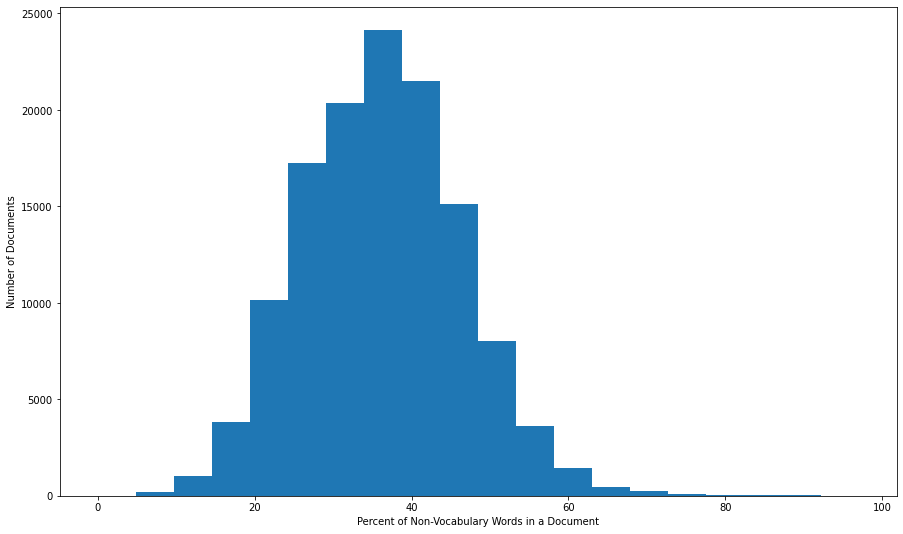

In [66]:
plt.figure(figsize=(15,9))
plt.hist(percents, 20)
plt.ylabel('Number of Documents')
plt.xlabel('Percent of Non-Vocabulary Words in a Document');

In [67]:
print(f"Each news article has between {min(doc1000_sizes)}\
and {max(doc1000_sizes)} tokens in it.")

Each news article has between 4and 177 tokens in it.
